## **1. Decision Tree**

zsh:1: command not found: pip
zsh:1: command not found: pip
2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

====== Model summary ======
Test validation:
Precision: 0.9852941176470589, Recall: 0.4267515923566879, F1-score: 0.5955555555555555, Accuracy: 0.9770838579702845


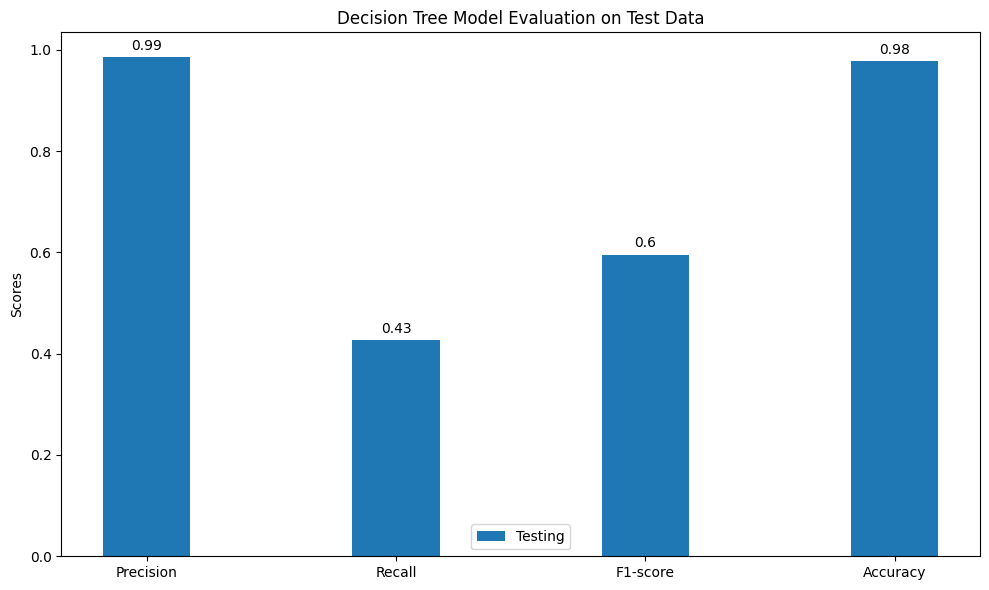

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip3 install loglizer
!pip3 install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import DecisionTree
from loglizer import dataloader, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = preprocessing.FeatureExtractor()
    x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test = feature_extractor.transform(x_test)

    # Initialize and train the Decision Tree model
    model = DecisionTree()
    model.fit(x_train, y_train)

    # Evaluate the model on the test data
    print('Test validation:')
    y_test_pred = model.predict(x_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}, Accuracy: {accuracy_test}')

    # Collect metrics for plotting
    metrics_labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    test_metrics = [precision_test, recall_test, f1_test, accuracy_test]

    # Plotting the results
    x = np.arange(len(metrics_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    rects = ax.bar(x, test_metrics, width, label='Testing')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Decision Tree Model Evaluation on Test Data')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.legend()

    # Adding values on top of bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    fig.tight_layout()

    plt.show()


## **2. SVM**

2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

Test validation:
Precision: 1.0, Recall: 0.2356687898089172, F1-score: 0.38144329896907214, Accuracy: 0.9697809116091665


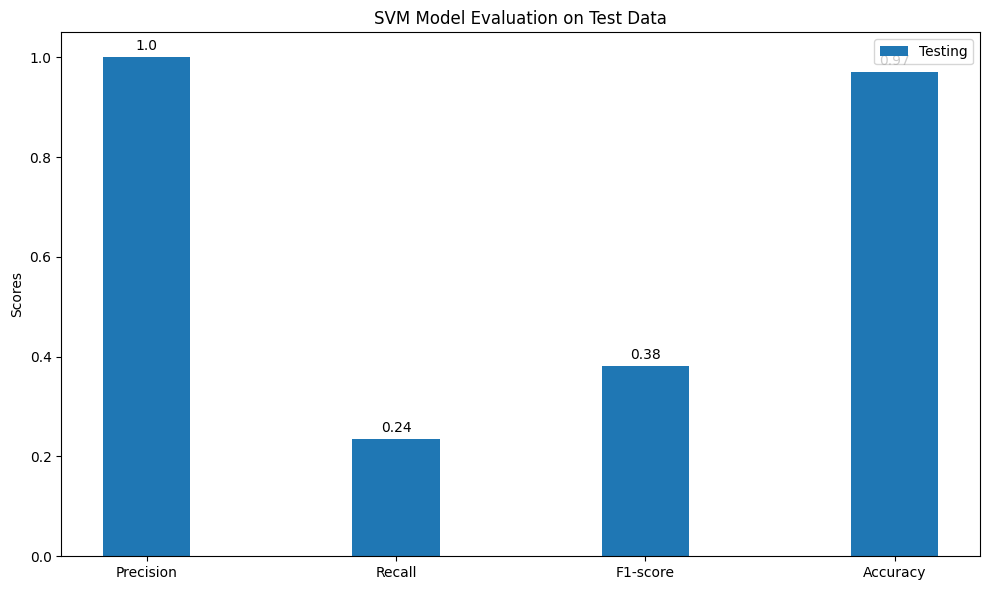

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip3 install loglizer
!pip3 install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import DecisionTree
from loglizer import dataloader, preprocessing
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = preprocessing.FeatureExtractor()
    x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test = feature_extractor.transform(x_test)
    
    # Initialize and train the SVM model
    model = SVC()
    model.fit(x_train, y_train)

    # Evaluate the model on the test data
    print('Test validation:')
    y_test_pred = model.predict(x_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}, Accuracy: {accuracy_test}')

    # Collect metrics for plotting
    metrics_labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    test_metrics = [precision_test, recall_test, f1_test, accuracy_test]

    # Plotting the results
    x = np.arange(len(metrics_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    rects = ax.bar(x, test_metrics, width, label='Testing')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('SVM Model Evaluation on Test Data')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.legend()

    # Adding values on top of bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    fig.tight_layout()

    plt.show()


## **3. Logistic Regression**

zsh:1: command not found: pip
zsh:1: command not found: pip
2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

Test validation:
Precision: 1.0, Recall: 0.2356687898089172, F1-score: 0.38144329896907214, Accuracy: 0.9697809116091665


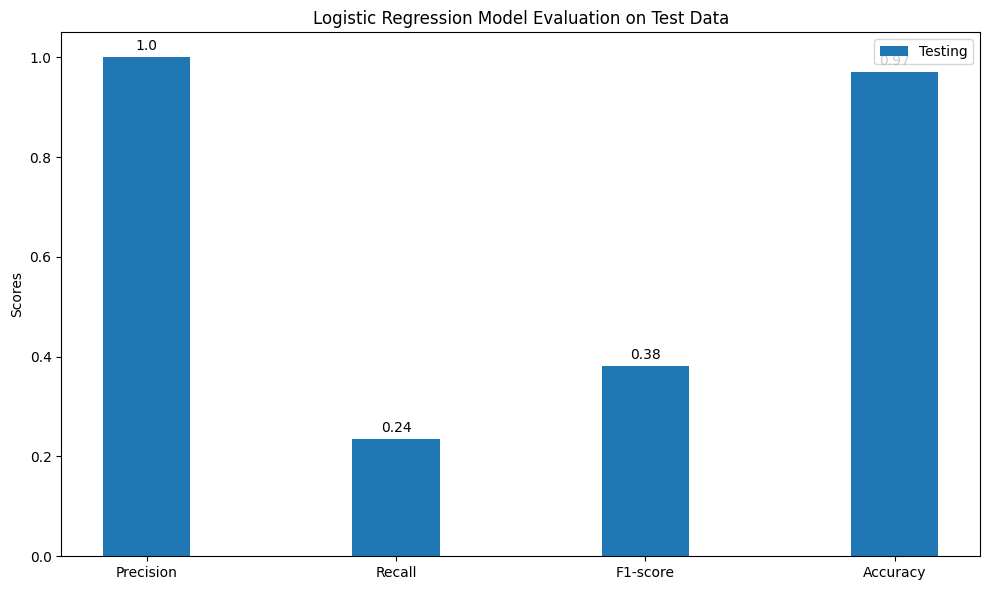

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip3 install loglizer
!pip3 install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import DecisionTree
from loglizer import dataloader, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = preprocessing.FeatureExtractor()
    x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test = feature_extractor.transform(x_test)
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)

    # Evaluate the model on the test data
    print('Test validation:')
    y_test_pred = model.predict(x_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}, Accuracy: {accuracy_test}')

    # Collect metrics for plotting
    metrics_labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    test_metrics = [precision_test, recall_test, f1_test, accuracy_test]

    # Plotting the results
    x = np.arange(len(metrics_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    rects = ax.bar(x, test_metrics, width, label='Testing')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Logistic Regression Model Evaluation on Test Data')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.legend()

    # Adding values on top of bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    fig.tight_layout()

    plt.show()


## **4. Naive Bayes**

zsh:1: command not found: pip
zsh:1: command not found: pip
2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

Test validation:
Precision: 0.9855072463768116, Recall: 0.43312101910828027, F1-score: 0.6017699115044248, Accuracy: 0.9773356837068748


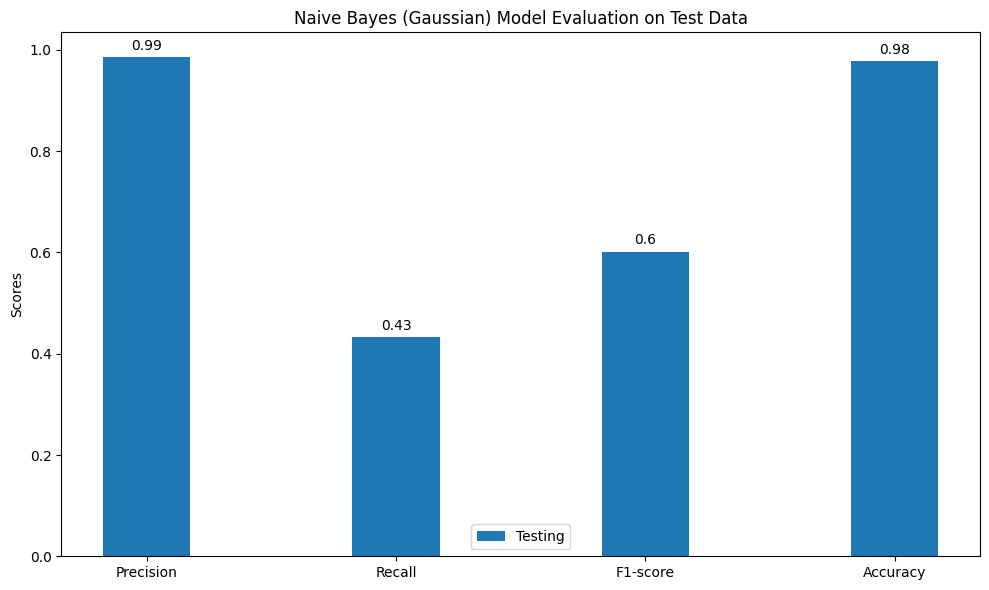

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip install loglizer
!pip install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import DecisionTree
from loglizer import dataloader, preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = preprocessing.FeatureExtractor()
    x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test = feature_extractor.transform(x_test)
    
    # Initialize the Naive Bayes model
    model = GaussianNB()
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Evaluate the model on the test data
    print('Test validation:')
    y_test_pred = model.predict(x_test)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}, Accuracy: {accuracy_test}')

    # Collect metrics for plotting
    metrics_labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    test_metrics = [precision_test, recall_test, f1_test, accuracy_test]

    # Plotting the results
    x = np.arange(len(metrics_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    rects = ax.bar(x, test_metrics, width, label='Testing')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Naive Bayes (Gaussian) Model Evaluation on Test Data')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_labels)
    ax.legend()

    # Adding values on top of bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    fig.tight_layout()

    plt.show()


## **5. Log Clustering**

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip install loglizer
!pip install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import LogClustering
from loglizer import dataloader, preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

max_dist = 0.3  # the threshold to stop the clustering process
anomaly_threshold = 0.3  # the threshold for anomaly detection

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = preprocessing.FeatureExtractor()
    x_train = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test = feature_extractor.transform(x_test)
    
    model = LogClustering(max_dist=max_dist, anomaly_threshold=anomaly_threshold)
    model.fit(x_train[y_train == 0, :])  # Use only normal samples for training
    
    # Evaluate the model on the test data
    print('Test validation:')
    y_test_pred = model.predict(x_test)

    # Since LogClustering does not directly output binary predictions,
    # we need to map the clustering results to anomaly labels for evaluation
    y_test_pred_binary = np.where(y_test_pred > anomaly_threshold, 1, 0)

    precision = precision_score(y_test, y_test_pred_binary)
    recall = recall_score(y_test, y_test_pred_binary)
    f1 = f1_score(y_test, y_test_pred_binary)
    accuracy = accuracy_score(y_test, y_test_pred_binary)
    print(f'Precision: {precision}, Recall: {recall}, F1-score: {f1}, Accuracy: {accuracy}')


zsh:1: command not found: pip
zsh:1: command not found: pip
2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

====== Model summary ======
Starting offline clustering...
Processed 1000 instances.
Found 3 clusters offline.

Starting online clustering...
Processed 2000 instances.
Processed 3813 instances.
Found 3 clusters online.

Test validation:
Precision: 0.967032967032967, Recall: 0.5605095541401274, F1-score: 0.7096774193548387, Accuracy: 0.9818685469654999


zsh:1: command not found: pip
zsh:1: command not found: pip
2.2.2
====== Input data summary ======
Loading HDFS_100k.log_structured.csv
156 157
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal

====== Transformed train data summary ======
Train data shape: 3969-by-14

====== Transformed test data summary ======
Test data shape: 3971-by-14

====== Model summary ======
====== Model summary ======
Starting offline clustering...
Processed 1000 instances.
Found 2 clusters offline.

Starting online clustering...
Processed 2000 instances.
Processed 3813 instances.
Found 3 clusters online.



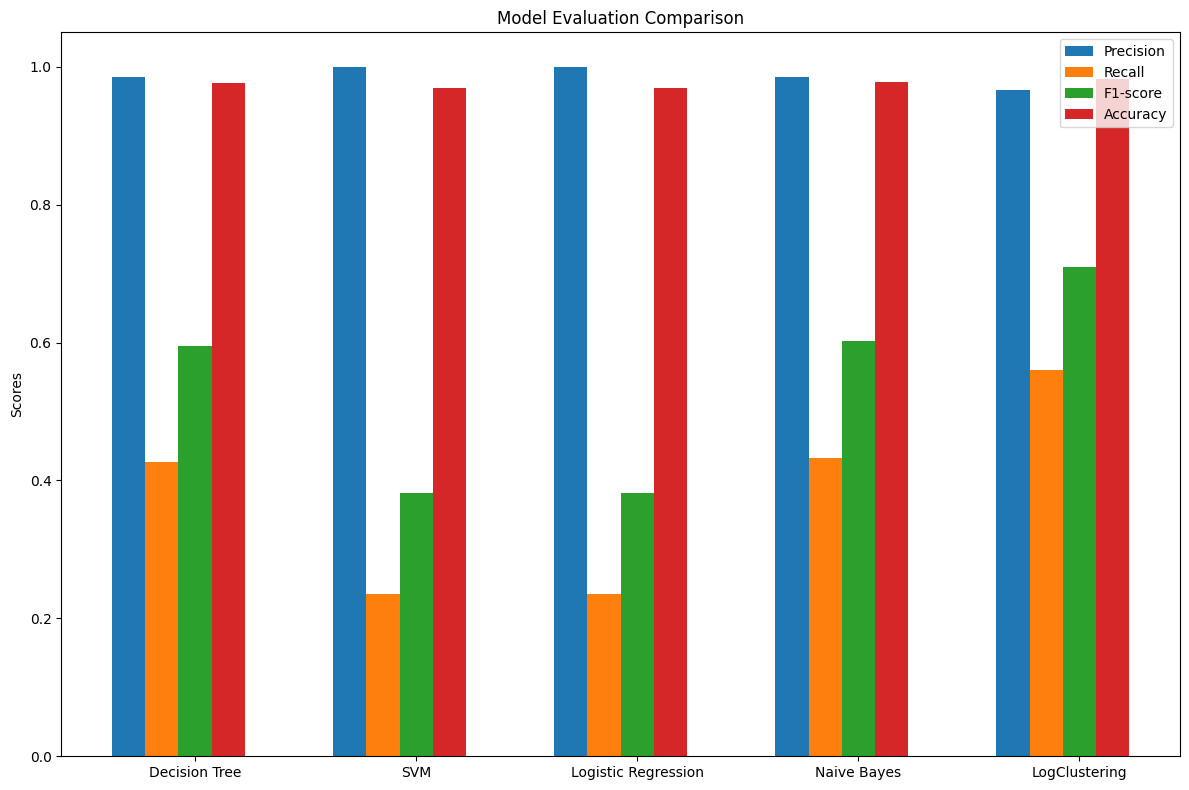

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
!pip install loglizer
!pip install torch torchvision torchaudio
import torch
print(torch.__version__)
import loglizer
sys.path.append('../')
from loglizer.models import DecisionTree, LogClustering
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from loglizer.preprocessing import FeatureExtractor
from loglizer import dataloader, preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define paths to the structured log file and anomaly label file
struct_log = 'HDFS_100k.log_structured.csv'  # The structured log file
label_file = 'anomaly_label.csv'  # The anomaly label file

# Parameters for LogClustering
max_dist = 0.3  # the threshold to stop the clustering process
anomaly_threshold = 0.3  # the threshold for anomaly detection

def evaluate_decision_tree(x_train, y_train, x_test, y_test):
    # Initialize and train the Decision Tree model
    model = DecisionTree()
    model.fit(x_train, y_train)
    
    # Evaluate on test data
    y_test_pred = model.predict(x_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    return precision, recall, f1, accuracy

def evaluate_svm(x_train, y_train, x_test, y_test):
    # Initialize and train the SVM model
    model = SVC()
    model.fit(x_train, y_train)
    
    # Evaluate on test data
    y_test_pred = model.predict(x_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    return precision, recall, f1, accuracy

def evaluate_logistic_regression(x_train, y_train, x_test, y_test):
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)
    
    # Evaluate on test data
    y_test_pred = model.predict(x_test)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    return precision, recall, f1, accuracy

def evaluate_naive_bayes(x_train, y_train, x_test, y_test):
    # Initialize the Naive Bayes model
    model = GaussianNB()
    
    if isinstance(x_train, np.ndarray):
        # If x_train is already numpy array, no need to convert
        model.fit(x_train, y_train)
    else:
        # Convert sparse matrix to dense array
        model.fit(x_train.toarray(), y_train)
    
    # Evaluate on test data
    if isinstance(x_test, np.ndarray):
        y_test_pred = model.predict(x_test)
    else:
        y_test_pred = model.predict(x_test.toarray())
    
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    
    return precision, recall, f1, accuracy


def evaluate_logclustering(x_train, y_train, x_test, y_test):
    # Initialize and train the LogClustering model
    model = LogClustering(max_dist=max_dist, anomaly_threshold=anomaly_threshold)
    model.fit(x_train[y_train == 0, :])  # Use only normal samples for training
    
    # Evaluate on test data
    y_test_pred = model.predict(x_test)
    y_test_pred_binary = np.where(y_test_pred > anomaly_threshold, 1, 0)
    precision = precision_score(y_test, y_test_pred_binary)
    recall = recall_score(y_test, y_test_pred_binary)
    f1 = f1_score(y_test, y_test_pred_binary)
    accuracy = accuracy_score(y_test, y_test_pred_binary)
    
    return precision, recall, f1, accuracy

if __name__ == '__main__':
    # Load data
    (x_train, y_train), (x_test, y_test) = dataloader.load_HDFS(struct_log,
                                                                label_file=label_file,
                                                                window='session', 
                                                                train_ratio=0.5,
                                                                split_type='uniform')

    # Feature extraction
    feature_extractor = FeatureExtractor()
    x_train_fe = feature_extractor.fit_transform(x_train, term_weighting='tf-idf')
    x_test_fe = feature_extractor.transform(x_test)
    
    # Evaluate all models
    models = ['Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes', 'LogClustering']
    metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    
    results = {}
    for model_name in models:
        if model_name == 'Decision Tree':
            results[model_name] = evaluate_decision_tree(x_train_fe, y_train, x_test_fe, y_test)
        elif model_name == 'SVM':
            results[model_name] = evaluate_svm(x_train_fe, y_train, x_test_fe, y_test)
        elif model_name == 'Logistic Regression':
            results[model_name] = evaluate_logistic_regression(x_train_fe, y_train, x_test_fe, y_test)
        elif model_name == 'Naive Bayes':
            results[model_name] = evaluate_naive_bayes(x_train_fe, y_train, x_test_fe, y_test)
        elif model_name == 'LogClustering':
            results[model_name] = evaluate_logclustering(x_train_fe, y_train, x_test_fe, y_test)
    
    # Plotting the results
    x = np.arange(len(models))  # the label locations
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for i, metric in enumerate(metrics):
        scores = [results[model_name][i] for model_name in models]
        ax.bar(x + i*width, scores, width, label=metric)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Model Evaluation Comparison')
    ax.set_xticks(x + 2*width)
    ax.set_xticklabels(models)
    ax.legend(loc='best')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    fig.tight_layout()

    plt.show()
